**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [ ]:
!unzip images.zip

Archive:  images.zip
  inflating: cartoon.bmp             
  inflating: .DS_Store               
  inflating: cartoon_y.jpg           
  inflating: girl.png                
  inflating: girl_y.jpg              
  inflating: fingerprint.jpg         
   creating: .ipynb_checkpoints/
  inflating: .ipynb_checkpoints/ImagePreprocessing-OpenCV-checkpoint.ipynb  
  inflating: .ipynb_checkpoints/ImagePreprocessing-OpenCV Solution-checkpoint.ipynb  
  inflating: fingerprint_y.jpg       


In [ ]:
cartoon = cv2.imread("cartoon.bmp")
cartoon_y = cv2.imread("cartoon_y.jpg")
girl = cv2.imread("girl.png") #grayscale image
girl_y = cv2.imread("girl_y.jpg")
fingerprint = cv2.imread("fingerprint.jpg")
fingerprint_y = cv2.imread("fingerprint_y.jpg")

# Check if images loaded successfully
if cartoon is None:
    print("Error loading cartoon image. Check the file path.")



## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

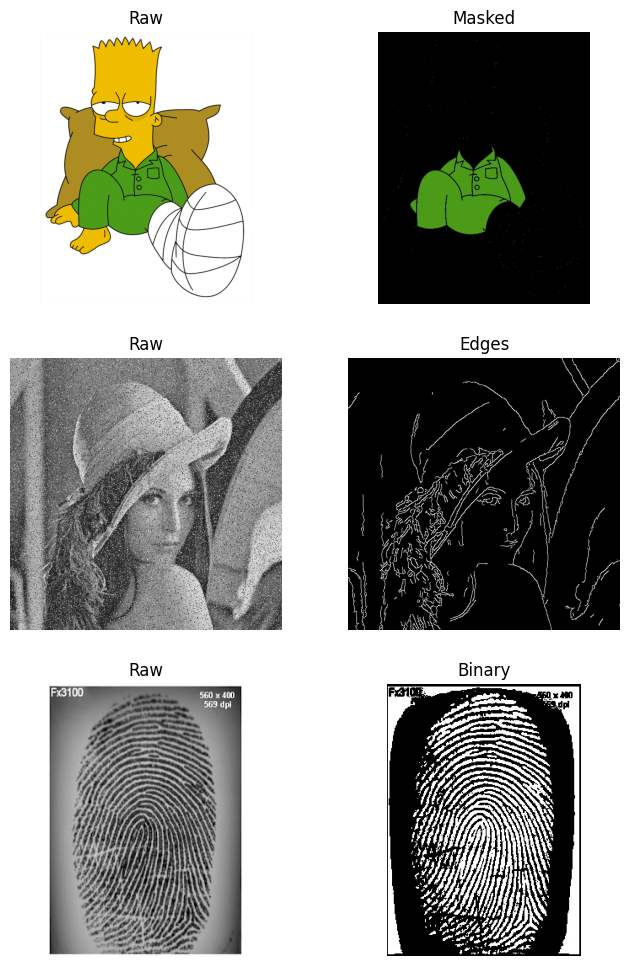

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

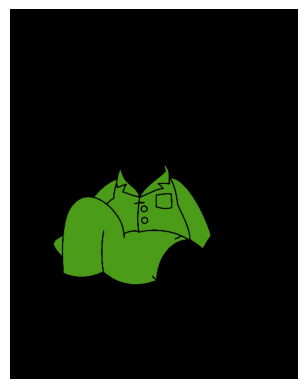

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'cartoon.bmp'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define the green color range for masking
lower_green = np.array([0, 100, 0])   # Lower bound for green in RGB
upper_green = np.array([100, 255, 100])  # Upper bound for green in RGB

# Create a mask for the green color
mask = cv2.inRange(image, lower_green, upper_green)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Store the final image in the specified variable
cartoon_y_mentee = masked_image

# Display the masked image (optional)
plt.imshow(cartoon_y_mentee)
plt.axis('off')
plt.show()


### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

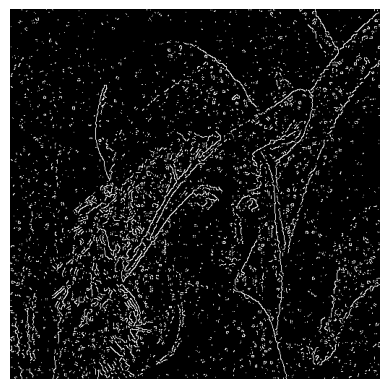

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = 'girl.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply Gaussian Blur to the image
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, 150, 150)  # Adjust thresholds if needed

# Store the final image in the specified variable
girl_y_mentee = edges

# Display the edges (optional)
plt.imshow(girl_y_mentee, cmap='gray')
plt.axis('off')
plt.show()


### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

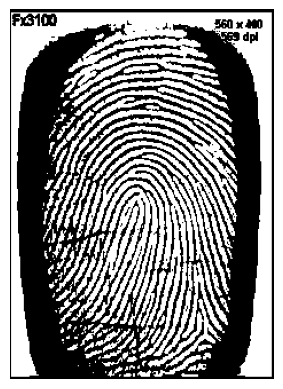

In [ ]:
#START CODE HERE (Do all your processing here)

fingerprint_y_mentee = None #(in Binary format only i.e. pixel intensity = 0 or 255)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale fingerprint image
image_path = 'fingerprint.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply Otsu's thresholding to convert the image to binary
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

inverted_binary_image = cv2.bitwise_not(binary_image)

# Store the final binary image in the specified variable
fingerprint_y_mentee = inverted_binary_image

# Display the binary image (optional)
plt.imshow(fingerprint_y_mentee, cmap='gray')
plt.axis('off')
plt.show()


#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

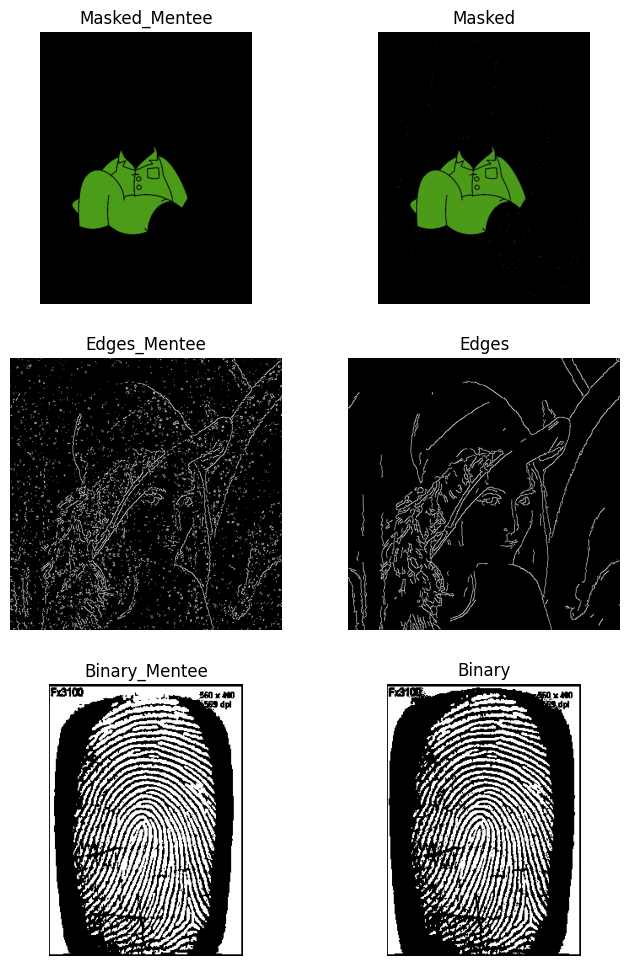

In [ ]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()